# Homework 1
## Exercise 1

### Task 1.A

In [ ]:
!pip3 install pandas
import pandas as pd

now, we load the data to countries_data from the [AIT Moodle](https://24spring.web-tools.hu/course/view.php?id=9)

In [ ]:
f = open("./Data/countries.csv", 'r')
countries_data = pd.read_csv(f)

Now, we load Income Per Person data from [Gapminder](https://www.gapminder.org/data/) "GDP/capita (US$, inflation-adjusted)" and "Life expectancy, at birth"

In [ ]:
income_data = pd.read_csv(open("./Data/gdppercapita_us_inflation_adjusted.csv", 'r'))
life_expectancy_data = pd.read_csv(open("./Data/lex.csv", 'r'))

### Task 1.B

first import necessary libraries as demonstrated in Lab1 in class (source: personal notes)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now let's write a function to plot the histogram. Firstly, we analyze the data in the csv file visually and see that not all numbers are in number format, so we first convert all of them to the correct format.

In [ ]:
def convert_to_numbers(df):
    new_df = df.copy()
    for column_name in new_df.columns[1:]:
        new_df[column_name] = df[column_name]
        new_df["contains_k"] = new_df[column_name].str.contains("k") == True
        new_df[column_name] = new_df[column_name].str.replace("k", "").astype(float)
        new_df[column_name] = np.where(new_df.contains_k == True, new_df[column_name]*1000, new_df[column_name])
        new_df.drop("contains_k", axis=1, inplace=True)
    return new_df


In [ ]:
income_data = convert_to_numbers(income_data)

Now we can simply plot the numbers

In [ ]:
def plot_income_per_year_hist(year):

    # Select the income data for the current year
    year = str(year)
    income_year = income_data[year].dropna()

    # Plot the histogram
    plt.hist(income_year, bins=10, color='red')
    plt.title(f'Income Distribution - {year}')
    plt.xlabel('Income per Capita')
    plt.ylabel('Frequency')
    plt.show()

Let's see the histograms of different years

In [ ]:
plot_income_per_year_hist(1969)
plot_income_per_year_hist(1991)
plot_income_per_year_hist(2000)
plot_income_per_year_hist(2021)


#### Income distribution
We can see that the income distribution has stably been uneven between the countries over the century. However, the trends show historical growth in 40-80 percentiles - in 1961 less countries were in these percentiles than in 2000 or 2021.

#### Income change
As for the growth, we see that the overall IpC has doubled in the time period of 1961-2021

### Task 1.C

First we visually check the data and see differcency in the name of the "Country" column, so we first standartize the column name. Then we pairwise merge the three dataframes as shown in [Merging dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [ ]:
def merge_dataframes(countries_data, income_data, life_expectancy_data):
    income_data.rename(columns={'country': 'Country'}, inplace=True)
    life_expectancy_data.rename(columns={'country': 'Country'}, inplace=True)
    return pd.merge(countries_data, income_data, on='Country').merge(life_expectancy_data, on='Country', suffixes=("_income", '_lex'))

### Task 1.D

First, we call the merge_dataframes from Task 1.C

In [ ]:
merged_data = merge_dataframes(countries_data, income_data, life_expectancy_data)

In [ ]:
plt.scatter(merged_data['2021_income'], merged_data['2021_lex'], color='blue')
plt.title('Life Expectancy vs. Income')
plt.xlabel('Income per Capita')
plt.ylabel('Life Expectancy')


Based on the plot we can see strong positive exponential relationship between the two variables

### Task 1.E

First we get take the needed columns from the data

In [106]:
income_data_1960 = merged_data[["Country", "Region", "1960_income"]].dropna()
income_data_2010 = merged_data[['Country','Region', '2010_income']].dropna()

Then we draw the boxplot diagram

<Axes: title={'center': '1960_income'}, xlabel='Region'>

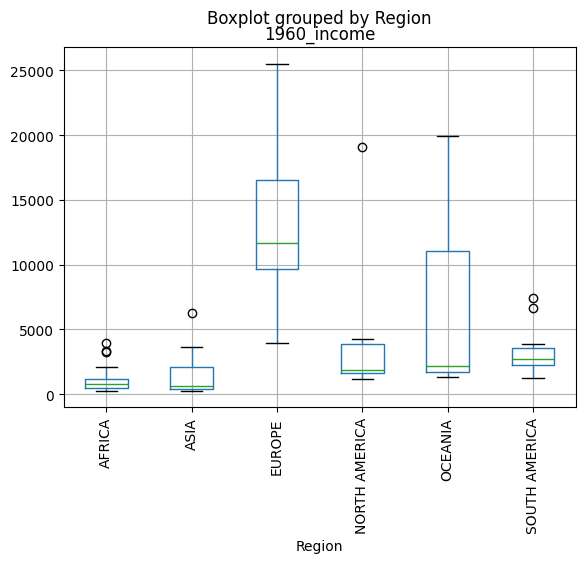

In [111]:
income_data_1960.boxplot(by='Region', column='1960_income', rot=90)

Since we see big difference in scales in the diagram, as well as strong outliers (e.g. USA in North America), we can do logarithmic rescaling

### Task 1.F


## Exercise 2

## Task 2.A


Load the file

In [ ]:
olympics120 = pd.read_csv(open("./Data/athlete_events.csv", 'r'))

Filter the data

In [ ]:
olympics120 = olympics120[olympics120['Season'] == 'Summer']

### Task 2.B

In [ ]:
print(olympics120.describe())

In [ ]:
olympics120_height = olympics120.sort_values('Height', ascending=False)
olympics120_weight = olympics120.sort_values('Weight', ascending=False)
olympics120_age = olympics120.sort_values('Age', ascending=False)


In [ ]:
print(f"Sports of the tallest players:\n {olympics120_height.head(10)['Sport']}\n")
print(f"Sports of the shortest players:\n {olympics120_height.tail(10)['Sport']}\n")
print(f"Sports of the heaviest players:\n {olympics120_weight.head(10)['Sport']}\n")
print(f"Sports of the lightest players:\n {olympics120_weight.tail(10)['Sport']}\n")
print(f"Sports of the oldest players:\n {olympics120_age.head(10)['Sport']}\n")
print(f"Sports of the youngest players:\n {olympics120_age.tail(10)['Sport']}\n")


### Task 2.C

First, let's import all needed the libraries

In [ ]:
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Next, filter data with the required fields

In [ ]:
men_in_bgw = olympics120[(olympics120['Sex'] == 'M') & (olympics120['Sport'].isin(['Basketball', 'Gymnastics', 'Wrestling']))]

Draw the plot. Used the conversation at [stackoverflow](https://stackoverflow.com/questions/66290803/make-colors-in-seaborn-based-on-column-names) to distinguish colors by sports

In [ ]:
def plot_weight_vs_height(df):
    sns.scatterplot(data=df, x='Weight', y='Height', hue='Sport')
    plt.title('Men in BGW - Weight vs Height')
    plt.xlabel('Weight')
    plt.ylabel('Height')
    plt.show()


In [ ]:
plot_weight_vs_height(men_in_bgw)

In [ ]:
london_2012 = men_in_bgw[(men_in_bgw['Year'] == 2012) & (men_in_bgw['Season'] == 'Summer')]
rome_1960 = men_in_bgw[(men_in_bgw['Year'] == 1960) & (men_in_bgw['Season'] == 'Summer')]

In [ ]:
plot_weight_vs_height(london_2012)

In [ ]:
plot_weight_vs_height(rome_1960)

We see a strong positive correlation between the weight and the height of the atheletes. 

### Task 2.D
First we check the data and see that gold medals can be identified by word "Gold" in the Medal column and country codes can be found in the NOC collumn (not the team, since it's too specific in cases)

In [83]:
DataFramegolds = olympics120[olympics120['Medal'] == 'Gold']

In [ ]:
gold_medals=DataFramegolds.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x)))

The code first takes filtered gold-medalist athletes and then groups them by country & year. This means that it creates groups for each unique pair of countries and years. After that, it counts these pairs and returns the final result.

## Works Cited
[Markdown basics](https://www.markdownguide.org/basic-syntax/)

[Merging dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

[stackoverflow](https://stackoverflow.com/questions/66290803/make-colors-in-seaborn-based-on-column-names) 